In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the time module.
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=495a7bdda3ab6a9703c634119bde9118


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | xining
Processing Record 2 of Set 13 | rikitea
Processing Record 3 of Set 13 | vaini
Processing Record 4 of Set 13 | hermanus
Processing Record 5 of Set 13 | bonavista
Processing Record 6 of Set 13 | nova olinda do norte
Processing Record 7 of Set 13 | nemuro
Processing Record 8 of Set 13 | ottawa
Processing Record 9 of Set 13 | kapaa
Processing Record 10 of Set 13 | caravelas
Processing Record 11 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 13 | cherskiy
Processing Record 13 of Set 13 | fereydun kenar
Processing Record 14 of Set 13 | jamestown
Processing Record 15 of Set 13 | borogontsy
Processing Record 16 of Set 13 | esperance
Processing Record 17 of Set 13 | coquimbo
Processing Record 18 of Set 13 | tessalit
Processing Record 19 of Set 13 | maloy
Processing Record 20 of Set 13 | ribeira grande
Processing Record 21 of Set 13 | cape town
Processing Record 22 of Set 13 | nikolskoye
Processing Record 23 of Set 13 |

Processing Record 35 of Set 16 | dikson
Processing Record 36 of Set 16 | statesville
Processing Record 37 of Set 16 | new norfolk
Processing Record 38 of Set 16 | toliary
City not found. Skipping...
Processing Record 39 of Set 16 | barrow
Processing Record 40 of Set 16 | necochea
Processing Record 41 of Set 16 | tabiauea
City not found. Skipping...
Processing Record 42 of Set 16 | tazmalt
Processing Record 43 of Set 16 | constantine
Processing Record 44 of Set 16 | kodiak
Processing Record 45 of Set 16 | batemans bay
Processing Record 46 of Set 16 | kassala
Processing Record 47 of Set 16 | nortelandia
Processing Record 48 of Set 16 | faya
Processing Record 49 of Set 16 | arraial do cabo
Processing Record 50 of Set 16 | yar-sale
Processing Record 1 of Set 17 | salta
Processing Record 2 of Set 17 | lolua
City not found. Skipping...
Processing Record 3 of Set 17 | praia da vitoria
Processing Record 4 of Set 17 | santa rosa
Processing Record 5 of Set 17 | la asuncion
Processing Record 6 of

Processing Record 20 of Set 20 | cockburn town
Processing Record 21 of Set 20 | klaksvik
Processing Record 22 of Set 20 | novo aripuana
Processing Record 23 of Set 20 | arman
Processing Record 24 of Set 20 | richards bay
Processing Record 25 of Set 20 | sambava
Processing Record 26 of Set 20 | teberda
Processing Record 27 of Set 20 | kachikau
City not found. Skipping...
Processing Record 28 of Set 20 | kibala
Processing Record 29 of Set 20 | vilani
Processing Record 30 of Set 20 | vargem grande
Processing Record 31 of Set 20 | hami
Processing Record 32 of Set 20 | oranjemund
Processing Record 33 of Set 20 | villa maria
Processing Record 34 of Set 20 | hirado
Processing Record 35 of Set 20 | mahajanga
Processing Record 36 of Set 20 | gizo
Processing Record 37 of Set 20 | bathsheba
Processing Record 38 of Set 20 | cap malheureux
Processing Record 39 of Set 20 | iracemapolis
Processing Record 40 of Set 20 | nyurba
Processing Record 41 of Set 20 | nanakuli
Processing Record 42 of Set 20 | 

Processing Record 5 of Set 24 | krasnogvardeyets
Processing Record 6 of Set 24 | havre-saint-pierre
Processing Record 7 of Set 24 | mao
Processing Record 8 of Set 24 | chagda
City not found. Skipping...
Processing Record 9 of Set 24 | lishui
Processing Record 10 of Set 24 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 24 | pitimbu
Processing Record 12 of Set 24 | berdigestyakh
Processing Record 13 of Set 24 | guarapari
Processing Record 14 of Set 24 | ganzhou
Processing Record 15 of Set 24 | ahualulco
Processing Record 16 of Set 24 | ca mau
Processing Record 17 of Set 24 | deputatskiy
Processing Record 18 of Set 24 | mason city
Processing Record 19 of Set 24 | yirol
City not found. Skipping...
Processing Record 20 of Set 24 | zhenjiang
Processing Record 21 of Set 24 | idlib
Processing Record 22 of Set 24 | woodward
Processing Record 23 of Set 24 | tucuma
Processing Record 24 of Set 24 | hun
Processing Record 25 of Set 24 | santa maria
Processing Record 26 of Set 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Xining,36.62,101.77,34.00,17,43,7.47,CN,2020-02-18 04:49:23
1,Rikitea,-23.12,-134.97,79.47,80,99,14.12,PF,2020-02-18 04:50:00
2,Vaini,-21.20,-175.20,82.40,65,20,14.99,TO,2020-02-18 04:50:00
3,Hermanus,-34.42,19.23,66.99,82,33,13.00,ZA,2020-02-18 04:50:00
4,Bonavista,48.65,-53.11,26.01,88,70,5.01,CA,2020-02-18 04:50:00
5,Nova Olinda Do Norte,-3.89,-59.09,74.79,98,19,1.95,BR,2020-02-18 04:50:00
6,Nemuro,43.32,145.57,30.20,68,75,9.17,JP,2020-02-18 04:50:01
7,Ottawa,45.41,-75.70,10.00,60,40,8.05,CA,2020-02-18 04:48:45
8,Kapaa,22.08,-159.32,77.00,73,75,17.22,US,2020-02-18 04:50:01
9,Caravelas,-17.71,-39.25,79.84,79,17,16.89,BR,2020-02-18 04:50:01


In [10]:
# Reorder the columns in the dataframe
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Xining,CN,2020-02-18 04:49:23,36.62,101.77,34.00,17,43,7.47
1,Rikitea,PF,2020-02-18 04:50:00,-23.12,-134.97,79.47,80,99,14.12
2,Vaini,TO,2020-02-18 04:50:00,-21.20,-175.20,82.40,65,20,14.99
3,Hermanus,ZA,2020-02-18 04:50:00,-34.42,19.23,66.99,82,33,13.00
4,Bonavista,CA,2020-02-18 04:50:00,48.65,-53.11,26.01,88,70,5.01
5,Nova Olinda Do Norte,BR,2020-02-18 04:50:00,-3.89,-59.09,74.79,98,19,1.95
6,Nemuro,JP,2020-02-18 04:50:01,43.32,145.57,30.20,68,75,9.17
7,Ottawa,CA,2020-02-18 04:48:45,45.41,-75.70,10.00,60,40,8.05
8,Kapaa,US,2020-02-18 04:50:01,22.08,-159.32,77.00,73,75,17.22
9,Caravelas,BR,2020-02-18 04:50:01,-17.71,-39.25,79.84,79,17,16.89


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

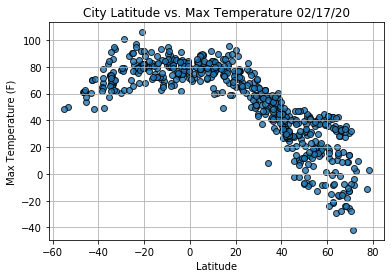

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

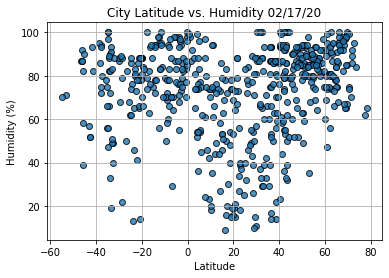

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

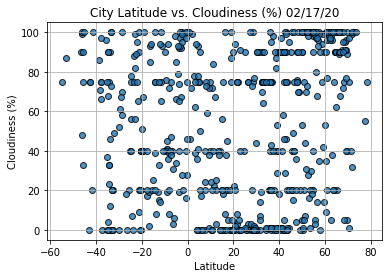

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

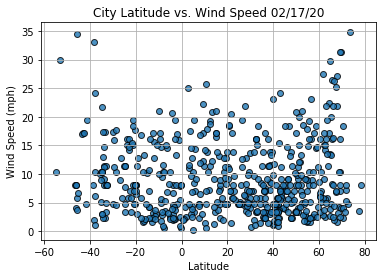

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()